# Scatter Plot of Match Duration with Average and Std Dev Range

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

time_dataframe = pd.DataFrame()
for file in os.listdir("raw/time_parquet"):
    single_stats = pd.read_parquet("raw/time_parquet/" + file)
    time_dataframe = pd.concat([time_dataframe, single_stats], axis= 'rows', ignore_index=True)

time_dataframe.head(10)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852
3,11673993,2894,2309,2084,None,None,1696160248
4,11674000,3177,None,None,None,None,1696089777
5,11674008,3419,3438,3320,None,None,1696099675
6,11674011,1960,3475,2040,None,None,1696178502
7,11674026,2130,1702,None,None,None,1696092102
8,11674032,3216,2694,2561,None,None,1696179281
9,11674034,3071,3039,None,None,None,1696085170


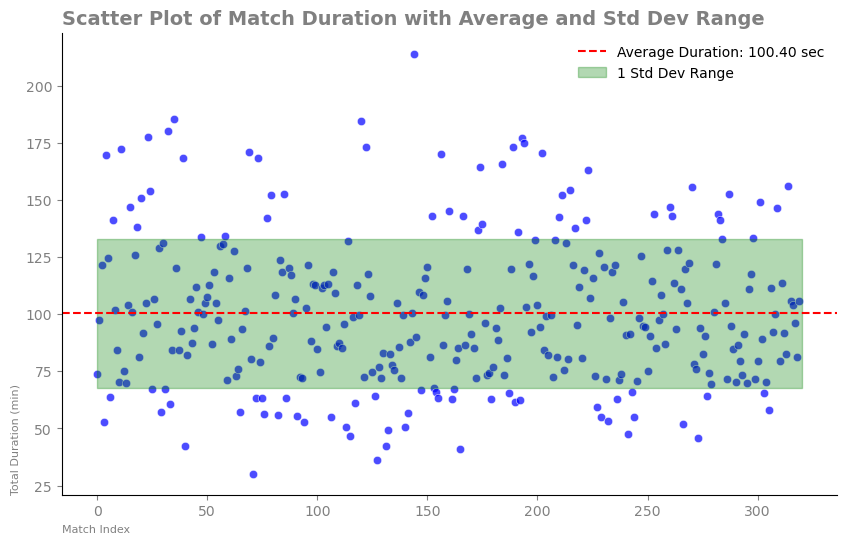

In [4]:
# جایگزینی مقادیر None با 0 برای محاسبه مجموع دوره‌ها
time_dataframe.fillna(0, inplace=True)

# محاسبه مجموع دوره‌ها (مدت زمان کل مسابقه) برای هر مسابقه
time_dataframe['total_duration'] = (
    time_dataframe['period_1'] +
    time_dataframe['period_2'] +
    time_dataframe['period_3'] +
    time_dataframe['period_4'] +
    time_dataframe['period_5']
)

# تبدیل total_duration از ثانیه به دقیقه
time_dataframe['total_duration'] = time_dataframe['total_duration'] / 60
# حذف بازی‌هایی که زمان مجموعشان صفر است
time_dataframe = time_dataframe[time_dataframe['total_duration'] > 0]

# محاسبه میانگین و انحراف معیار مدت زمان مسابقات
mean_duration = time_dataframe['total_duration'].mean()
std_duration = time_dataframe['total_duration'].std()

# تنظیمات اندازه نمودار
plt.figure(figsize=(10, 6))

# رسم نمودار پراکندگی فقط برای 1000 مسابقه اول
sns.scatterplot(x=range(min(320, len(time_dataframe))), y=time_dataframe['total_duration'][:1000], color='blue', alpha = 0.7)

# نمایش میانگین با یک خط افقی بر اساس محور Y (نقاط پراکندگی)
plt.axhline(y=mean_duration, color='red', linestyle='--', label=f'Average Duration: {mean_duration:.2f} sec')

# رسم ناحیه اطراف میانگین (± یک انحراف معیار)
plt.fill_betweenx(y=[mean_duration - std_duration, mean_duration + std_duration], 
                  x1=0, x2=320, color='green', alpha=0.3, label='1 Std Dev Range')

# عنوان و برچسب‌های نمودار
plt.title('Scatter Plot of Match Duration with Average and Std Dev Range', fontsize=14, color='gray', loc='left', fontweight='bold')
plt.xlabel('Match Index', fontsize=8, loc='left', color='gray')
plt.ylabel('Total Duration (min)', fontsize=8, loc='bottom', color='gray')

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# نمایش توضیح خط میانگین و ناحیه انحراف معیار
plt.legend(frameon=False)


# نمایش نمودار
plt.show()


تحلیل نمودار:

نمودار پراکندگی:


نقاط پراکندگی در نمودار نشان‌دهنده مدت زمان کل (به ثانیه) برای هر مسابقه است. اگر نقاط به طور متمرکز در یک ناحیه خاص باشند، به این معناست که زمان مسابقات معمولاً ثابت و یکنواخت است. اگر پراکندگی زیادی وجود داشته باشد، به معنای تنوع در مدت زمان مسابقات است.

میانگین:

خط افقی قرمز در نمودار نشان‌دهنده میانگین مدت زمان مسابقات است. این مقدار به ما اطلاعات کلی درباره اینکه یک مسابقه به طور متوسط چقدر طول می‌کشد، می‌دهد. اگر تعداد زیادی از نقاط زیر این خط باشند، نشان می‌دهد که بیشتر مسابقات کوتاه‌تر از میانگین هستند.

ناحیه انحراف معیار:

ناحیه سبز رنگ نشان‌دهنده انحراف معیار است. این ناحیه به ما می‌گوید که بیشتر مسابقات چقدر از میانگین فاصله دارند. اگر نقاط زیادی خارج از این ناحیه وجود داشته باشد، به این معناست که تعدادی از مسابقات به‌طور غیرمعمولی طولانی یا کوتاه هستند.

تنوع در زمان مسابقات:

اگر تعداد زیادی از نقاط در محدوده ناحیه انحراف معیار قرار داشته باشند، نشان می‌دهد که زمان مسابقات دارای تنوع متوسطی است. اگر نقاط زیادی در هر دو طرف میانگین (بالاتر و پایین‌تر) وجود داشته باشند، این نشان‌دهنده وجود برخی مسابقات با زمان‌های بسیار طولانی و برخی با زمان‌های بسیار کوتاه است.

تحلیل‌های احتمالی:

پیش‌بینی زمان مسابقات:

 با توجه به داده‌ها، می‌توان پیش‌بینی کرد که یک مسابقه در چه دامنه‌ای از زمان می‌تواند برگزار شود. این اطلاعات می‌تواند برای مدیریت زمان مسابقات و برنامه‌ریزی بهتر مفید باشد.